### **This Notebook Contains of Lasso and Ridge Practice**

**Why Lasso and Ridge ?**
 
- After fitting into polynomial regression, we may notice overfitting.
- Which means model predicts with high accyuracy on training data and testing accuracy drops.
- The problem is: Model has too many coeffecients with very high values.
- Soln: Lasso and Ridge method.

**Lasso Regularization (L1)**
- Lasso - Least Absolute Shrinkage and Selection Operator
-  Removes the features that are not important, makes the model simple 
- The model adds penalty for using too many features, it not only reduces overfitting also helps for feature selection

**Ridge Regularization (L2)**
- This feature tries to reduce the weight but not to zero
- It makes the model not to rely too much on any features by reducing large coeffecients
- This gives a more balanced model. It is used when all features are important but overfitting should be controlled as well

In [2]:
import numpy as np

In [3]:

np.random.seed(42) ##for generating same numbers each time I run
X= 2*np.random.rand(100,1) ##generates 100*1 array of random numbers between 0 and 1
y= 4 + 3 * X + np.random.randn(100,1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred= model.predict(X_test)
y_pred

array([[4.49875411],
       [9.15273606],
       [8.46643942],
       [7.85214193],
       [5.59173117],
       [6.6071719 ],
       [5.77852817],
       [8.975125  ],
       [4.25815864],
       [6.23983135],
       [6.56122114],
       [7.54434267],
       [8.70839426],
       [9.45538878],
       [4.81247932],
       [5.01640666],
       [8.46098398],
       [4.55746321],
       [8.80346608],
       [5.09761775]])

In [7]:
from sklearn.metrics import mean_squared_error

mse= mean_squared_error(y_test, y_pred)
mse

0.6536995137170021

- Ok, now I have to apply the regularization i.e., lasso and ridge

**Ridge:**
- In ridge alpha determines the how strongly the penalty should be applied on the coeffecients
- High alpha value ---> increases the penalty, making the coeffecients smaller and potrntially improving the model's ability to generalize
- alpha value 1 is a common starting point where it can be adjusted based on cross-validation performance

In [8]:
##Ridge Regression
from sklearn.linear_model import Lasso, Ridge

ridge_reg= Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
y_pred_ridge= ridge_reg.predict(X_test)
mse_ridge= mean_squared_error(y_pred_ridge, y_test)
mse_ridge

0.647613237305426

**Lasso**
- Here also alpha determines the penalty strength
- But lasso can shrink some coeffecients to zero, higher alpha is not suitable. alpha = 0.1 is better to keep the model sufficiently flexible whike still benefitting from the feature selecction.
- A samaller value of alpha should be choosen to avoid aggressive shrinking, which could otherwise leads to underfitting.

In [9]:
##Lasso Regression

lasso_reg= Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso= lasso_reg.predict(X_test)
mse_lasso= mean_squared_error(y_pred_lasso, y_test)
mse_lasso

0.6584189249611411

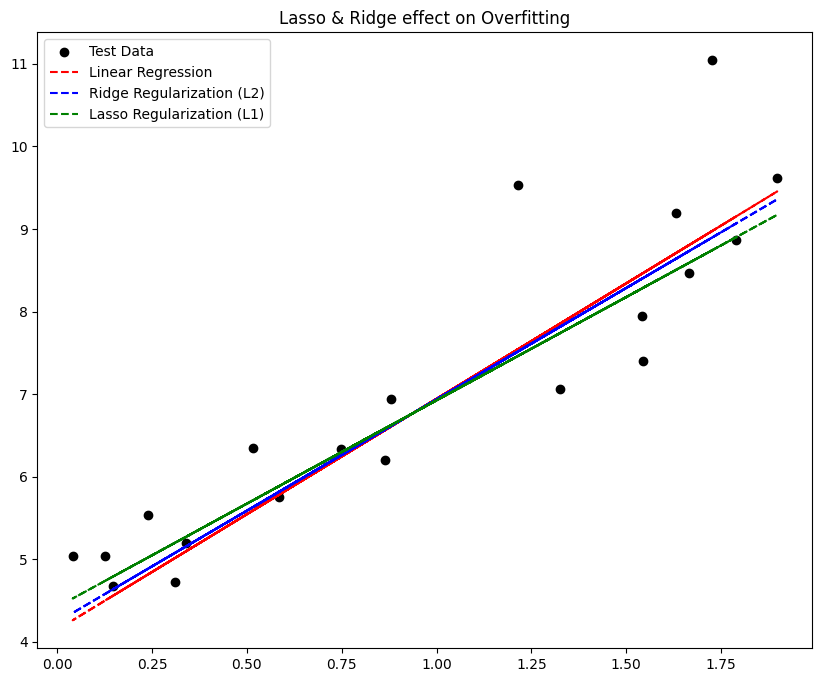

In [10]:
##Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test, color= 'black', label='Test Data')
plt.plot(X_test, y_pred, label='Linear Regression', color='red', linestyle='--')
plt.plot(X_test, y_pred_ridge, label='Ridge Regularization (L2)', color='blue', linestyle='--')
plt.plot(X_test, y_pred_lasso, label='Lasso Regularization (L1)', color='green', linestyle='--')
plt.title('Lasso & Ridge effect on Overfitting')
plt.legend()
plt.show()
